In [24]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utilsforecast.plotting import plot_series 
from coreforecast.scalers import boxcox, boxcox_lambda
from tsfeatures import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL, MSTL
from statsforecast import StatsForecast
sns.set_style("whitegrid")
plt.style.use("ggplot")
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.constrained_layout.use": True,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "legend.title_fontsize": 10,
})

warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv(f'../DATA/tourism.csv')
df['ds'] = pd.to_datetime(df['ds'])
df = df.set_index('ds')
df = df[df['Purpose'] == 'Holiday']
df['unique_id'] = df['Region'] + '_' + df['Purpose']
df.head()

,Region,State,Purpose,y,unique_id
ds,,,,,
1998-01-01,Adelaide,South Australia,Holiday,223.557406,Adelaide_Holiday
1998-04-01,Adelaide,South Australia,Holiday,130.287369,Adelaide_Holiday
1998-07-01,Adelaide,South Australia,Holiday,156.089398,Adelaide_Holiday
1998-10-01,Adelaide,South Australia,Holiday,182.328980,Adelaide_Holiday
1999-01-01,Adelaide,South Australia,Holiday,185.331880,Adelaide_Holiday


In [20]:
all_features = [
    acf_features,
    arch_stat,
    crossing_points,
    entropy,
    flat_spots,
    heterogeneity,
    holt_parameters,
    lumpiness,
    nonlinearity,
    pacf_features,
    stl_features,
    stability,
    hw_parameters,
    unitroot_kpss,
    unitroot_pp,
    series_length,
    hurst,
]
stl_feat = tsfeatures(df, freq=4, features=[stl_features])

In [27]:
stl_feat = stl_feat.drop(columns=['nperiods', 'seasonal_period'])
stl_feat = stl_feat.set_index('unique_id')

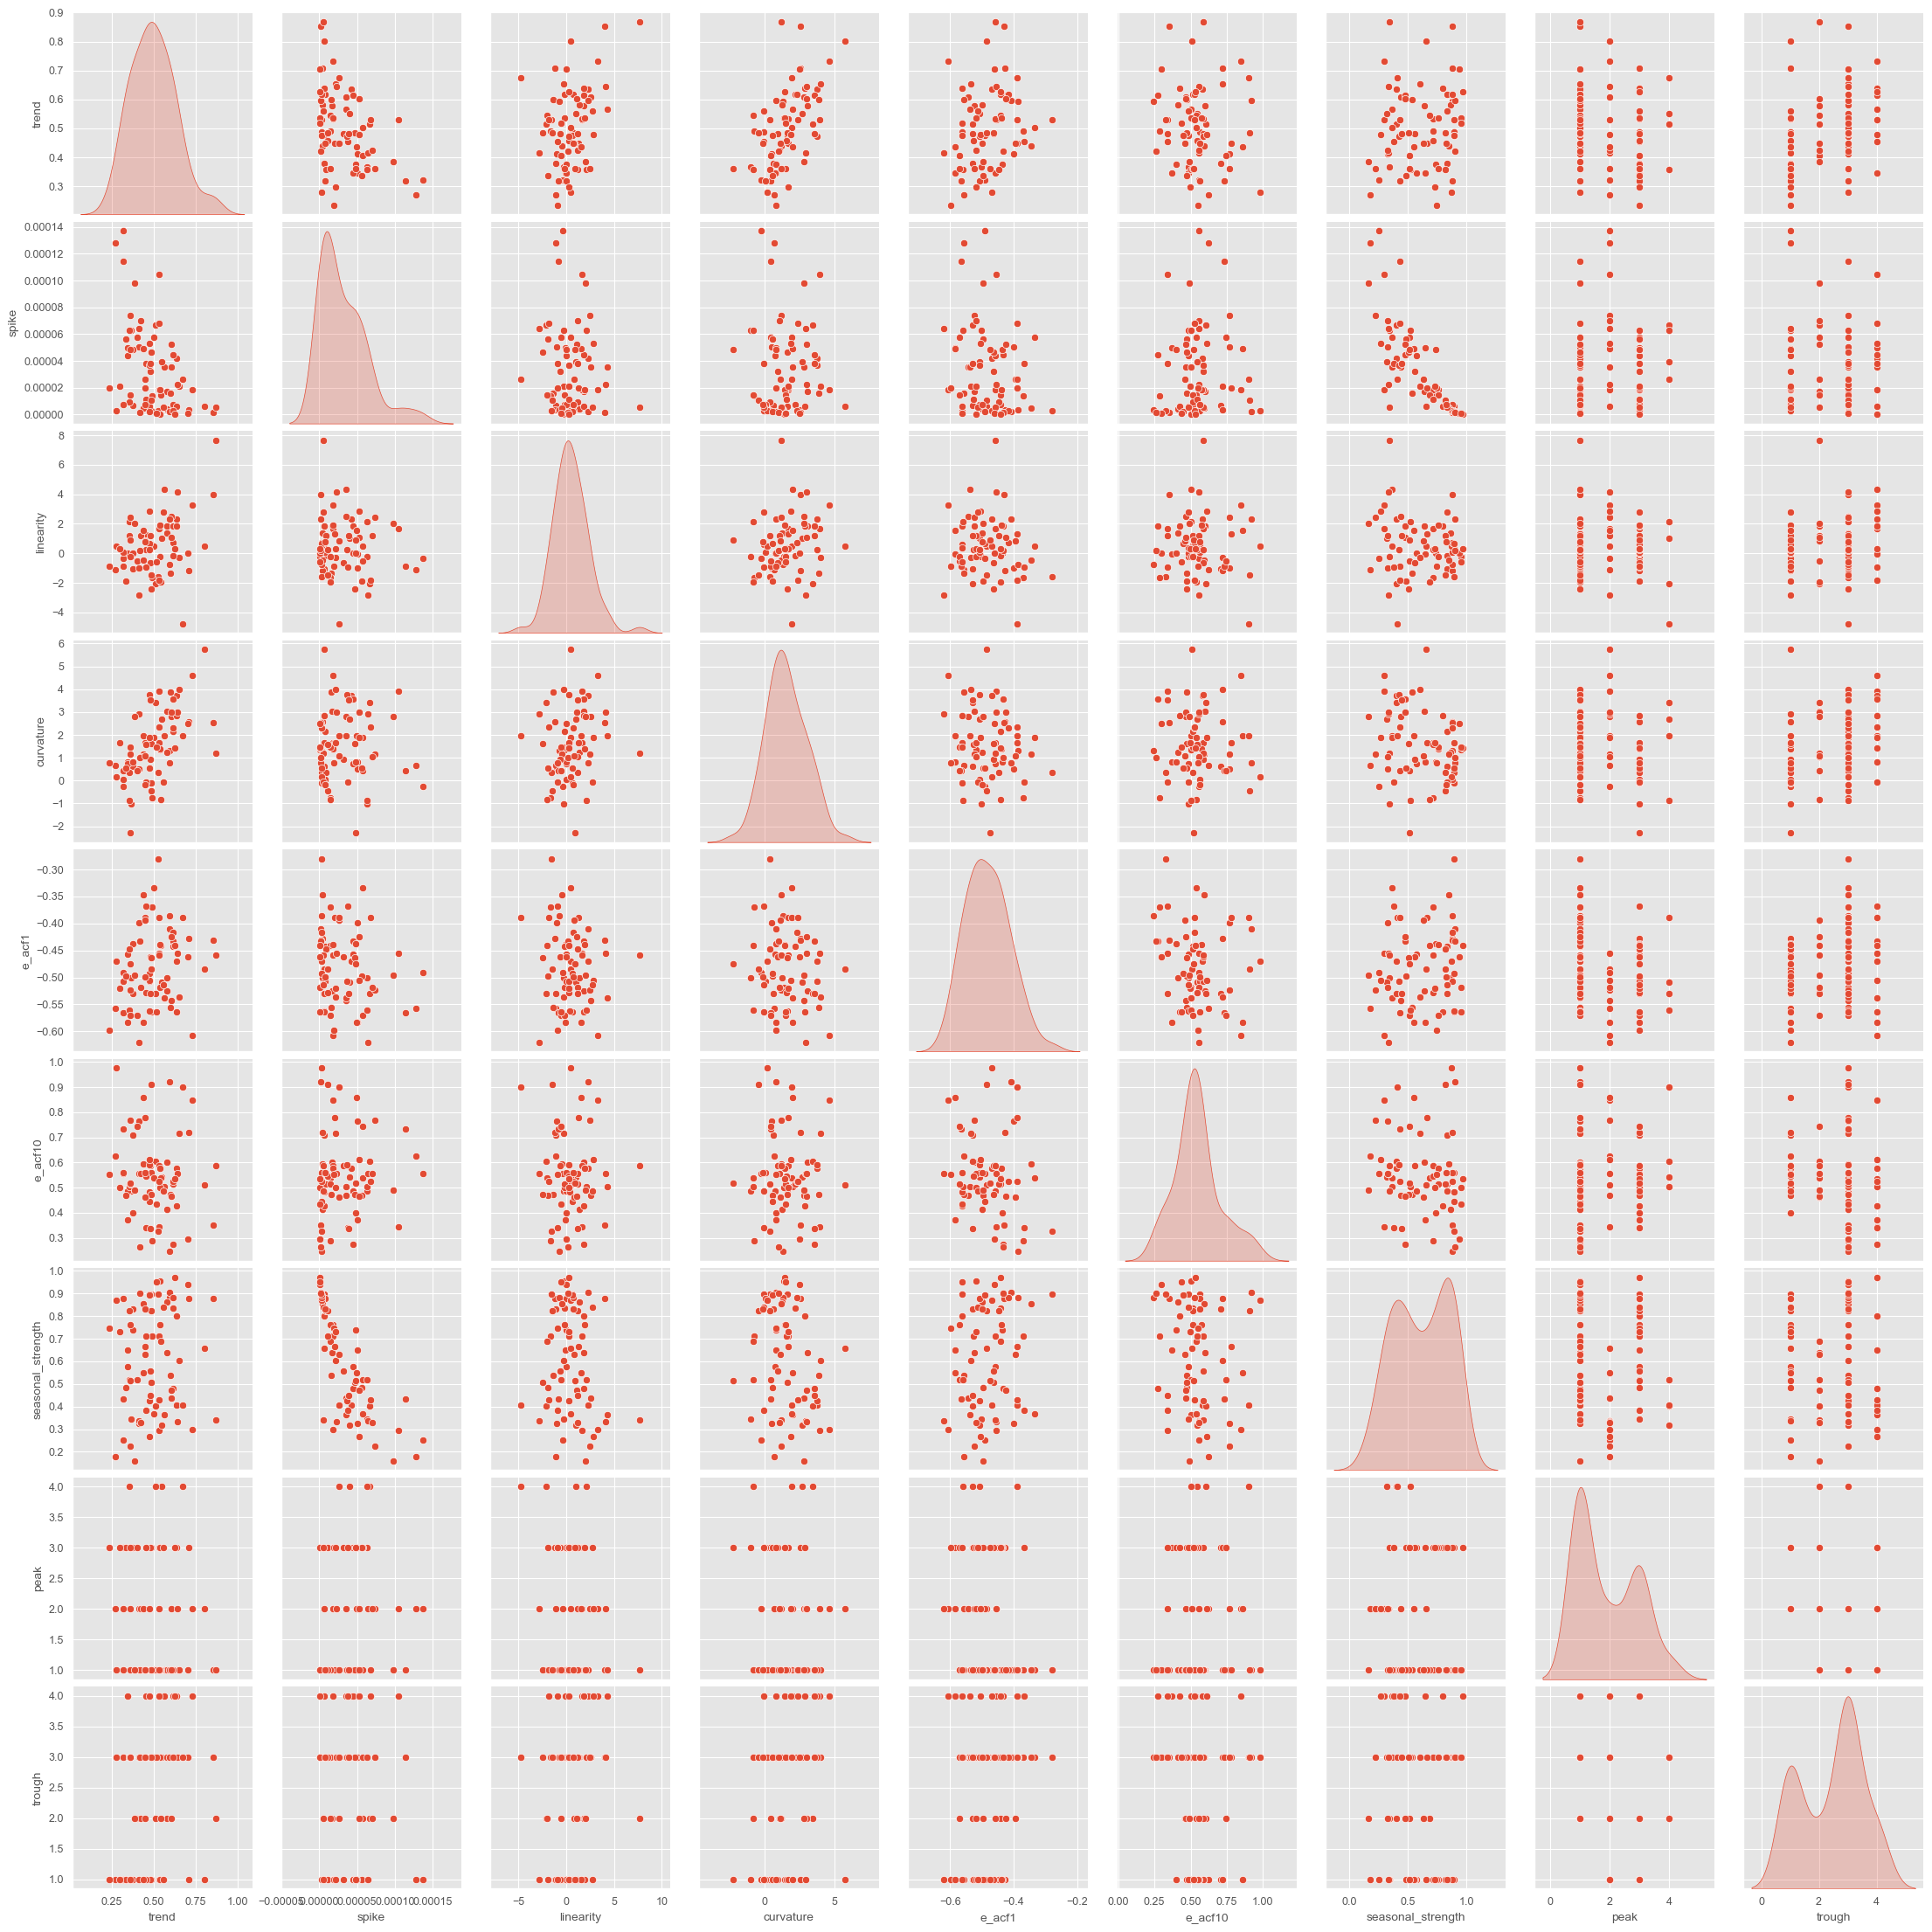

In [28]:
sns.pairplot(stl_feat, diag_kind='kde')

In [31]:
stl_feat['peak'].value_counts()

peak
1    38
3    22
2    12
4     4
Name: count, dtype: int64

In [32]:
stl_feat['peak']

unique_id
Adelaide Hills_Holiday                2
Adelaide_Holiday                      1
Alice Springs_Holiday                 3
Australia's Coral Coast_Holiday       2
Australia's Golden Outback_Holiday    1
                                     ..
Western Grampians_Holiday             1
Whitsundays_Holiday                   3
Wilderness West_Holiday               1
Wimmera_Holiday                       1
Yorke Peninsula_Holiday               1
Name: peak, Length: 76, dtype: int64